# <span style="color:cornflowerblue"> **Tarea Examen 1 Física Computacional**</span>
#### Dehesa Corona Valeria Carolina
*Elaborado en Jupyter Notebook*


$\color{blue}{\text{Problema 1 = 10.}}$

$\color{blue}{\text{Problema 2 = 10.}}$

$\color{blue}{\text{Problema 3 = 10.}}$

$\color{red}{\text{Calificación 30}}$

#### Bibliotecas adicionales:

In [1]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

**1. En clase vimos como en un arreglo puede representar la gráfica de una función $f(x)$ con los puntos $ \{x_i
, f_i \}$ con $i = 1, 2, 3, ..., N$. También vimos como obtener las primeras derivadas numéricas en cada punto, $f'
(x_i)$ y $f''(x_i)$, es decir, podemos obtener el conjunto de puntos $ \{x_i, f'(i) \}$ y $ \{x_i, f''(i) \}$. Este
problema consiste en hacer lo mismo pero para el caso de la integral, y para ello realice una función
que tenga como entrada los puntos $ \{x_i, f_i \}$ y que regrese $\{x_i, F_i \}$, donde $F_i$ representa la integral de la
función hasta el $x_i$-ésimo punto. Para corroborar que su función trabaja de manera adecuada, puede
utilizar la función $cos(x)$ en el intervalo $[0, 2\pi]$. Puede utilizar cualquier algoritmo de integración que
vimos en clase o en las tareas.**

Para esta parte, utilizamos el algoritmo 1 del NB6.

Deacuerdo con lo visto en clase: $\int_{x_0}^{x_n} f(x)dx = \int_{x_0}^{x_0 + h/2} f(x)dx + \sum_{i = 1}^{N-1} \int_{x_i - h/2}^{x_i + h/2} f(x)dx + \int_{x_N- h/2}^{x_N} f(x)dx $.

También utilizando la siguiente expresión para puntos anteriores: $\int_{x_i - h/2}^{x_i + h/2} f(x)dx = \frac{f(x_{i+1} + 22 f(x_i) + f(x_{i-1})}{24} h$

Y finalmente, las siguientes expresiones para puntos extremos:

$\int_{x_0}^{x_0 + h/2} f(x)dx = \frac{h}{48} (17f(x_0) + 7f(x_1)+ f(x_2) - f(x_3))$ y 

$\int_{x_N- h/2}^{x_N} f(x)dx = \frac{h}{48} (17f(x_N) +7f(x_{N-1}) + f(x_{N-2}) - f(x_{N-3}))$

In [2]:
def int_alg1(x,y):
    integral = 0
    h = x[1] -x[0]
    Hasta = np.zeros(len(y))
    for i in range(1,len(y)-1):
        integral = integral +  y[i+1] + 22*y[i] + y[i-1]
        Hasta[i] = integral 
    
    
    Hasta[0] = integral + 0.5*( 17*y[0] + 7*y[1] + y[2] - y[3] ) # lado izq
    Hasta[-1] = integral + 0.5*( 17*y[-1] + 7*y[-2] + y[-3] - y[-4] ) # lado der
    return Hasta*(h/24)

In [3]:
n = 100
x_1 = np.linspace(0,(2*np.pi),n)
b = np.sin(10*x_1)
f_1 = np.cos(x_1)
int1 = int_alg1(x_1,f_1)
int1

array([-0.03172799,  0.06332811,  0.12627347,  0.18858261,  0.25000464,
        0.31029222,  0.36920262,  0.42649861,  0.48194948,  0.53533196,
        0.58643108,  0.6350411 ,  0.68096627,  0.72402168,  0.76403394,
        0.80084196,  0.83429751,  0.86426588,  0.8906264 ,  0.91327293,
        0.93211427,  0.94707456,  0.95809355,  0.96512689,  0.96814624,
        0.96713945,  0.96211058,  0.95307987,  0.94008368,  0.92317435,
        0.90241997,  0.8779041 ,  0.84972547,  0.81799754,  0.78284806,
        0.74441857,  0.70286381,  0.65835111,  0.61105971,  0.56118002,
        0.50891291,  0.45446882,  0.398067  ,  0.33993454,  0.28030553,
        0.21942006,  0.15752332,  0.09486452,  0.03169599, -0.03172794,
       -0.09515186, -0.15832039, -0.22097919, -0.28287593, -0.3437614 ,
       -0.40339041, -0.46152287, -0.51792469, -0.57236878, -0.62463589,
       -0.67451558, -0.72180698, -0.76631968, -0.80787444, -0.84630393,
       -0.88145341, -0.91318134, -0.94135997, -0.96587584, -0.98

Ahora, definimos la función que reciba $ \{x_i, f_i \}$ y que regrese $\{x_i, F_i \}$, donde $F_i$ representa la integral de la
función hasta el $x_i$-ésimo punto.

In [4]:
def Arreglo_int(x_i,f):
    n = 100
    x = np.linspace(0,(2*np.pi),n)
    tupla = []
    array = int_alg1(x,f)
    
    tupla.append(x[x_i])
    tupla.append(array[x_i])
    
    return tupla

In [5]:
i = 4
Arreglo_int(i,f_1)

[0.25386607301735703, 0.2500046353151579]

Finalmente, para revisar que $\int_{0}^{2 \pi}cos(x)dx = [sin]_0^{2\pi}$

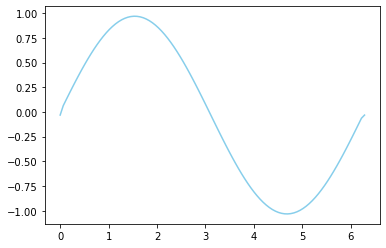

In [9]:
plt.plot(x_1,int_alg1(x_1,f_1),'skyblue')


**2.En la página del curso, en la misma sección donde está este examen, hay un archivo que se llama t_acel.dat. Este es un archivo de texto que contiene datos de tiempos, $t_i$, y aceleración, $a_i$, acomodados dos columnas. Descargue el archivo en el mismo directorio donde está realizando su notebook. Para leer los datos del archivo en Python hay que usar:**

In [10]:
datos = loadtxt('t_acel.dat')

**en donde datos[:,0] se guardarán los valores que corresponden al tiempo y en datos[:,1] se guardarán
los valores de la aceleración.**

In [11]:
x = datos[:,0] #Tiempo
y = datos[:,1] #Aceleración
y

array([2.55700489, 2.47268963, 2.39676553, 2.31656837, 2.20838878,
       2.17088553, 2.18578773, 2.17215124, 2.16328754, 2.14311269,
       2.12162414, 2.12402589, 2.11046867, 2.10615978, 2.13905096,
       2.15530531, 2.15921305, 2.19675329, 2.23793878, 2.28493282,
       2.32998412, 2.36265126, 2.40132901, 2.43678538, 2.48830746,
       2.54472219, 2.57863026, 2.58837188, 2.57667945, 2.57729587,
       2.58956406, 2.61251335, 2.60992529, 2.56915725, 2.53384234,
       2.51187281, 2.49965158, 2.52043826, 2.55253619, 2.55211716,
       2.58341034, 2.68515735, 2.82108224, 2.98195305, 3.12722033,
       3.21204203, 3.27989055, 3.30535656, 3.25081851, 3.18221448,
       3.1079889 , 3.02732753, 2.96547011, 2.92333183, 2.91585116,
       2.9309524 , 2.94814331, 2.95542247, 2.96461768, 2.96871572,
       2.91404135, 2.83053511, 2.75266289, 2.6631594 , 2.55788761,
       2.46558999, 2.38573364, 2.31831879, 2.27099207, 2.24674053,
       2.2055344 , 2.16802606, 2.14022756, 2.0948821 , 2.06413

**(a) Haga la gráfica de los datos.**

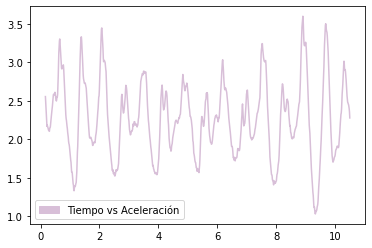

In [12]:
plt.plot(datos[:,0], datos[:,1],'thistle')

thistle_patch = mpatches.Patch(color='thistle', label='Tiempo vs Aceleración')
plt.legend(handles=[thistle_patch])

plt.show()

**(b) Calcule la derivada en cada punto utilizando algoritmos que desprecian términos en $h^3$ y $h^5$.
Compare las gráficas de cada uno de los algoritmos y proporcione el error máximo entre los
algoritmos utilizados**

Para algoritmos de este ejercicio, tomamos las expresiones revisadas en clase en el Notebook 3.

Para el primer algortimo: deriv_h3, se desprecian términos en $h^3$. Programamos la derivada simétrica expresada: 
$f'(x_i)=\frac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}}$

Y las expresiones para los puntos extremos: 

$f'(x_0)=-\frac{f(x_1)-f(x_0)}{x_1-x_0}$ , $f'(x_N)=-\frac{f(x_{N-1})-f(x_N)}{x_{N-1}-x_N}$

En el siguiente algoritmo: deriv_h5, se desprecian términos en $h^5$. Recordemos que esto implica tener que hacer operaciones con dos puntos a la izquierda y dos a la derecha para una expresión simétrica. Esta expresión referida es:
$f'(x_i)=\frac{1}{12h}\left(-f(x_{i+2})+8f(x_{i-1})+f(x_{i-2})\right)$

Donde los puntos extremos se calculan de manera asimétrica con la siguiente expresión:
$f'(x_i)=\frac{1}{h}\left(-\frac{25}{12}f(x_i)+4f(x_{i+1})-3f(x_{i+2})+\frac{4}{3}f(x_{i+3})-\frac{1}{4}f(x_{i+4})\right)$

In [13]:
def deriv_h3(f,x):
    h = x[1] - x[0]
    f_prima = zeros(len(f))
    for i in range(1,len(f)-1): #Mediante un ciclo evaluamos los puntos no extremos
        f_prima[i] = ( f[i+1]-f[i-1] )/h
    #Ahora para los puntos extremos
    # calcular el primer punto
    f_prima[0] = ( -0.5*f[2] + 2*f[1] -1.5*f[0] )/ h
    # calcular el ultimo punto
    f_prima[-1] = -( -0.5*f[-3] + 2*f[-2] -1.5*f[-1] )/h
    return f_prima

In [14]:
def deriv_h5(f,x):
    f_prima = zeros(len(f))
    h = x[1] - x[0]
    for i in range(2,len(f)-2): #Mediante un ciclo evaluamos los puntos no extremos
        f_prima[i] = ( -f[i+2]+ 8*(f[i+1]-f[i-1]) +f[i-2] )/(12*(x[i+1] - x[i]))
    #Ahora los puntos extremos 
    # calcular el primer punto
    f_prima[0] = ( (-25/12)*f[0] + (4)*f[1] - (3)*f[2] + (4/3)*f[3] - (0.25)*f[4] )/h
    # calcular el segundo punto
    f_prima[1] = ( (-25/12)*f[1] + (4)*f[2] - (3)*f[3] + (4/3)*f[4] - (0.25)*f[5] )/h
    # calcular el ultimo punto o el punto N
    f_prima[-1] = - ((-25/12)*f[-1] + (4)*f[-2] - (3)*f[-3] + (4/3)*f[-4] - (0.25)*f[-5])/h
    # calcular el penultimo punto o el N-1
    f_prima[-2] = - ((-25/12)*f[-2] + (4)*f[-3] - (3)*f[-4] + (4/3)*f[-5] - (0.25)*f[-6])/h
    return f_prima

In [15]:
derivada_sh3 = deriv_h3(y,x)
derivada_sh5 = deriv_h5(y,x)

error_h3h5 = abs(deriv_h5(y,x)-deriv_h3(y,x))
max_error = max(error_h3h5)

print('El error máximo es de :',max_error)

El error máximo es de : 15.875752705671683


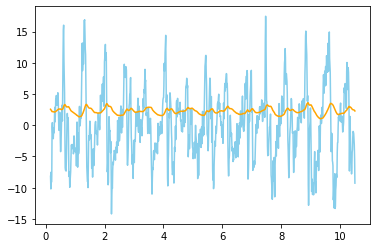

In [16]:
plt.plot(x,derivada_sh5, 'skyblue') 
plt.plot(x,y, 'orange') 

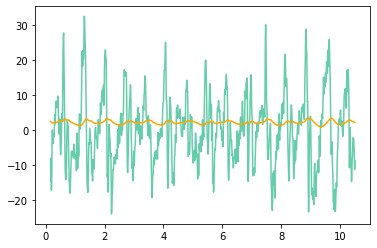

In [17]:
plt.plot(x,derivada_sh3, 'mediumaquamarine') 
plt.plot(x,y, 'orange')

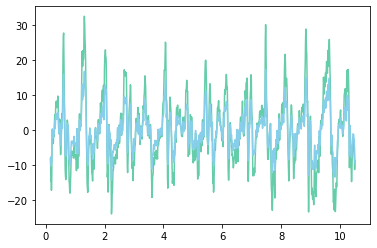

In [18]:
plt.plot(x,derivada_sh3, 'mediumaquamarine') 
plt.plot(x,derivada_sh5, 'skyblue') 

**(c) Calcule la integral total de los datos con el algoritmo int_alg2 que viene en el NB 6 de la página
del curso y compare el resultado utilizando el algoritmo de Boole. ¿Cuál es la diferencia numérica
entre ambos algoritmos?**

El segundo algoritmo visto en clase que calcula la integral numérica pero utilizando en intervalo de validez completo para cada $x_i$ en el intervalo $[x_i−h,x_i+h]$. Ocupa únicamente los puntos pares o impares, por lo que ahorra en costo de operaciones. 

La expresión utilizada para el algoritmo cuando se tiene un número impar de puntos es:

$\int_{x_i−h}^{x_i+h}f(x)dx = \frac{h}{3}(f(x_{i+1})+ 4f(x_i) + f(x_{i-1}))$


Y en caso de tener un número par, para el primer punto tenemos la expresión revisada en clase:

$\int_{x_0}^{x_0+h}f(x)dx = \frac{h}{48}(23f(x_{0})+ 26f(x_1) - 4f(x_{2}) + 6f(x_3) -3f(x_4))$



In [19]:
def int_alg2(x,y):
    integral = 0
    h = x[1] - x[0]
    if mod(len(y),2) == 0:
        inicio = 2
    elif mod(len(y),2) == 1:
        inicio = 1
    for i in range(inicio,len(y)-1,2):
        integral = integral + y[i+1] + 4*y[i] + y[i-1]
    integral = integral*(h/3)
    # punto inicial si se tiene un arreglo par
    if mod(len(y),2) == 0:
        integral = integral + (h/48)*(23*y[0] + 26*y[1] - 4*y[2] + 6*y[3] -3*y[4])
    return integral

Ahora, para el algortimo de la Regla de Boole para integración numérica, utilizamos la siguiente expresión:


$\int_{x_1}^{x_5}f(x)dx = \frac{2h}{45}(7f(x_{1})+ 32f(x_2) + 12f(x_{3}) + 32f(x_4) -7f(x_5))$


Exeptuando el caso en el que el número de puntos no sea múltiplo de 4. En dicho caso tomamos el sobrante (1,2 ó 3), y para esos puntos iniciales ocupamos la expresión vista en clase:
$\int_{x_0}^{x_0+h}f(x)dx = \frac{h}{48}(23f(x_{0})+ 26f(x_1) - 4f(x_{2}) + 6f(x_3) -3f(x_4))$


In [20]:
def integral_Boole(x,y):
    #Metemos la condición de cantidad de puntos múltiplo de 4
    if (len(x)-1)%4 == 0:    
        return integralrestoen_cuatro(x,y)
    
    else:
        #Una vez más utilizamos la fórmula de las notas para primeros puntos para los 1,2,ó 3 puntos sobrantes
        sum = 0
        for i in range(int((len(x)-1)%4)):
            sum += (x[1]-x[0])/48 * (23*y[i]+26*y[i+1]-4*y[i+2]+6*y[i+3]-3*y[i+4])
        ##Dividimos para casos donde para poder dividir en grupos de cuatro en cuatro, si sobran uno o dos o tres puntos quitamos las entradas necesarias
        if (len(x) - 1) % 4 == 1: 
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            return sum + integralrestoen_cuatro(x,y)
        elif (len(x)-1)%4 == 2: 
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            return sum + integralrestoen_cuatro(x,y)
        else: 
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            x = np.delete(x, 0)
            y = np.delete(y, 0)
            return sum + integralrestoen_cuatro(x,y)

In [21]:
def integralrestoen_cuatro(x,y):
    sum = 0
    for i in range(int(len(x)//4)):
        j = 4*i 
        sum = sum + (2*(x[1]-x[0])/45)*(7*y[j]+32*y[j+1]+12*y[j+2]+32*y[j+3]+7*y[j+4])    
    return sum

In [22]:
inteboole = integral_Boole(x,y)
intealg2 = int_alg2(x,y)
errores = abs(inteboole-intealg2 )

print('La diferencia numérica es de',errores)


La diferencia numérica es de 0.00020247568118847425


**(d) Calcule la integral de los datos, es decir, un conjunto de puntos $\{t_i, v_i\}$ tales que su derivada numérica sean los puntos $\{t_i, ai\}$ proporcionados por el archivo.**

Utilizaremos el algoritmo 1 de integrales numéricas para integrar la aceleración respecto al tiempo.

In [23]:
def Arreglo_intdatos():
    x = datos[:,0] #Tiempo
    y = datos[:,1] #Aceleración
    t_vi = []

    a = int_alg1(x,y) #Integramos la aceleración con respecto al tiempo
    
    for i in range(len(x)):
        t_vi.append([x[i],a[i]]) #formamos un arreglo que combine el tiempo con la integración de la aceleración
    return t_vi

In [24]:
Arreglo_intdatos()

[[0.166, 24.977258647602167],
 [0.177, 0.02720343186424359],
 [0.187, 0.053565894194358414],
 [0.197, 0.07903532095496972],
 [0.208, 0.10335999084955884],
 [0.218, 0.1272637508800151],
 [0.228, 0.15129433567632708],
 [0.239, 0.17519018682515902],
 [0.249, 0.19898116553179723],
 [0.259, 0.2225548030074685],
 [0.27, 0.2459036182904549],
 [0.28, 0.2692605885968708],
 [0.29, 0.29247998276789455],
 [0.301, 0.31566479033297934],
 [0.311, 0.33918672565703667],
 [0.321, 0.3628894252519926],
 [0.332, 0.38665618370923566],
 [0.342, 0.4108221406017521],
 [0.352, 0.4354421294710949],
 [0.363, 0.4605755000882302],
 [0.373, 0.4861996493391844],
 [0.383, 0.512191568111197],
 [0.394, 0.5386047107288109],
 [0.404, 0.565416713380891],
 [0.414, 0.5927903378730108],
 [0.425, 0.6207719663594022],
 [0.435, 0.6491258228938128],
 [0.445, 0.6775880896547968],
 [0.456, 0.7059372051852477],
 [0.466, 0.7342928001460773],
 [0.477, 0.7627829002691835],
 [0.487, 0.7915088424893062],
 [0.497, 0.8202005214862313],
 [0

**3. Sabemos que $\int_{1}^{\infty}\frac{dx}{x^2} = 1$, sin embargo numéricamente no es factible utilizar el infinito. De esta
manera genere una forma de calcular dicha integral hasta obtener una precisión de $10^{−3}$. Explique
su procedimiento de tal manera que pueda garantizar el resultado de dicha integral y cual sería su
generalización.**


Pensar en la integración por métodos numéricos de $\int_{1}^{\infty}\frac{dx}{x^2}$ implicaría una infinidad de intervalos a considerar. Por lo tanto, un método que utilizaremos será el de cambiar la variable, medida y límites de la integral impropia.

* Comenzamos cambiando la variable de 

    + $x \rightarrow y^{-1}$
    
* Cambiamos la medida derivando $x$

    + $dx \rightarrow -y^{-2} dy$
    
* Finalmente aplicamos los cambios anteriores a los límites:

    + $x = 1 \rightarrow y = 1^{-1}$
    + $x = \infty \rightarrow y = 0$
    
Que nos deja: $\int_{0}^{1}\frac{f(y^{-1})}{y^2} dy$


In [25]:
def funcion_a_int(x): #Tomamos la función a integrar del ejercicio 3
    f = 1/(x**2)
    return f

def int_impropia(f):
    lim_inf = 1 
    h = 0.05
    integral = 0
    
    y = 0.5*h #Buscamos el punto medio de h
    
    while (y < lim_inf**-1): #Aplicamos el cambio al límite inferior y se convierte en el superior
        area = ((funcion_a_int(y**-1)) / (y**2) )*h #Escribimos la nueva función a integrar con la composición anterior
        integral += area
        y += h
        
    return integral

Como sabemos:  $\int_{1}^{\infty}\frac{dx}{x^2} = 1$

In [26]:
z = int_impropia(funcion_a_int)
err = abs(1-z)
errr = 10**(-3)- (1-z)
print('El valor de la integral es :', z)
print('Como el valor debe ser 1, el error es de :', err)
print('Como',errr,'positivo, el error es menor a 10**-3') 

El valor de la integral es : 1.0000000000000004
Como el valor debe ser 1, el error es de : 4.440892098500626e-16
Como 0.0010000000000004441 positivo, el error es menor a 10**-3
